# **Group 7 - Python Project - IE SCHOOL OF SCIENCE AND TECHNOLOGY** 


## Table of Contents
* [Question 1](#question1)
* [Question 2](#question2)
* [Question 3](#question3)
* [Question 4](#question4)
* [Question 5](#question5)
* [Question 6](#question6)
    * [Insight 1](#insight1)
    * [Insight 2](#insight2)
    * [Insight 3](#insight3)
* [Question 7](#question7)
    * [Strategy 1](#strategy1)
    * [Strategy 2](#strategy2)

## **Import libraries and explore data**
In this project we are going to explore the Titanic.csv. To start with, we import the libraries we are going to work during this project.

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
# Reading the csv file into a df

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Exploring data to find out if we have columns with missing values

df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

----------------------------------------

## Question 1 <a class="anchor" id="question1"></a>

Read the dataset correctly using pandas, using an appropriate column as index. What is the PassengerId of "Mr. Robert William Norman"?

In [4]:
df.loc[df["Name"] == "Mr. Robert William Norman" ] # We get all column values for Robert William

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
234,235,0,2,Mr. Robert William Norman,male,24.0,0,0,C.A. 29566,10.5,NaN,S


In [5]:
robert_william = df.loc[df["Name"] == "Mr. Robert William Norman"]["PassengerId"].values[0]
print("The Passenger Id of Mr. Robert William Norman is:", robert_william)

The Passenger Id of Mr. Robert William Norman is: 235


------------------------------------------------

## **Question 2** <a class="anchor" id="question2"></a>
Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers. 

*(Side-note): In Python, the {:.2f} format specifier is used to specify a floating-point number with two decimal places. When used in a string format, it will convert a number to a string representation with two decimal places. So everytime something like "{:.2f}%" appears, is for correctly formatting the numbers being displayed.*

*For example, **print(percentage_survivors)** will return 0.383838383838.*
*Whereas **print("{:.2f}%".format(percentage_survivors))** will return 38.38%, which is way easier to read*

The percentage of survivors is: 38.38%



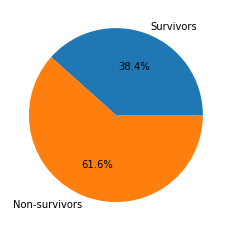

In [6]:
#Percentage of survivors out of the total number of passengers

n_survivors = df.loc[df["Survived"] == 1].shape[0]
percentage_survivors = (n_survivors/df.shape[0])*100

print("The percentage of survivors is:" , "{:.2f}%" "\n".format((percentage_survivors)))


#Plot of survivors
plt.pie([percentage_survivors, 100-percentage_survivors], labels=["Survivors", "Non-survivors"], autopct="%.1f%%") #autopct="%.1f%%" gives a format to the numbers inside the pie plot
plt.show()

The percentage of men is: 64.76%
The percentage of women is: 35.24%



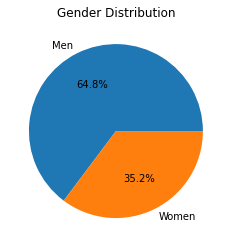

In [7]:
# Percentage of men and women out of total number of passengers.

men = (df.loc[df["Sex"] == "male"]).shape[0]
women = (df.loc[df["Sex"] == "female"]).shape[0]

print("The percentage of men is:", "{:.2f}%".format((men/df.shape[0])*100))
print("The percentage of women is:", "{:.2f}%" "\n".format((women/df.shape[0])*100))

# Plotting gender distribution
plt.pie([(men/df.shape[0])*100, (women/df.shape[0])*100], labels=['Men', 'Women'], autopct='%.1f%%')
plt.title('Gender Distribution')
plt.show()

------------------------------------------------

## **Question 3** <a class="anchor" id="question3"></a>

Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women). 

The percentage of men that survived is: 18.89%
The percentage of women that survived is: 74.20%



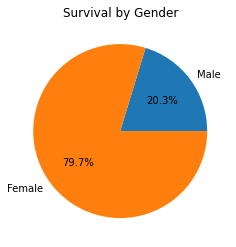

In [8]:
# Percentage of survivors by sex (the percentage of male passengers that survived and female passengers that survived)

male_survivors = df.loc[(df["Sex"] == "male") & (df["Survived"] == 1)].shape[0]
female_survivors = df.loc[(df["Sex"] == "female") & (df["Survived"] == 1)].shape[0]

print("The percentage of men that survived is:","{:.2f}%".format((male_survivors/men)*100))
print("The percentage of women that survived is:","{:.2f}%" "\n".format((female_survivors/women)*100))

# Plot of survival by gender
plt.pie([(male_survivors/men)*100, (female_survivors/women)*100], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Survival by Gender')
plt.show()

The distribution of male survivors was: 31.87%
The distribution of female survivors was: 68.13%



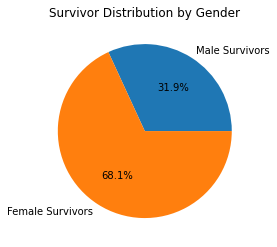

In [9]:
# And the sex distribution of survivors (percentage of survivors that were men and percentage of survivors that were women)

distr_of_MS = (male_survivors/n_survivors)*100
distr_of_FS = (female_survivors/n_survivors)*100

print("The distribution of male survivors was:",  "{:.2f}%".format(distr_of_MS))
print("The distribution of female survivors was:",  "{:.2f}%" "\n".format(distr_of_FS))

# Plot of the gender distribution between survivors
plt.pie([distr_of_MS, distr_of_FS], labels=['Male Survivors', 'Female Survivors'], autopct='%1.1f%%')
plt.title('Survivor Distribution by Gender')
plt.show()

-----------------------------------------------

## **Question 4** <a class="anchor" id="question4"></a>

Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving.

We found two different ways of doing this.
The first solution is more done like brute-force style, but seems to be way more easy to understand than the second

This is the first approach we did:

In [10]:
p1 = (df.loc[(df["Sex"] == "male") & (df["Survived"] == 1)])["PassengerId"].count() / df["PassengerId"].count()
p2 = (df.loc[(df["Sex"] == "female") & (df["Survived"] == 1)])["PassengerId"].count() / df["PassengerId"].count()
p3 = (df.loc[(df["Sex"] == "male") & (df["Survived"] == 0)])["PassengerId"].count() / df["PassengerId"].count()
p4 = (df.loc[(df["Sex"] == "female") & (df["Survived"] == 0)])["PassengerId"].count() / df["PassengerId"].count()

This first approach may look easy to do with a 2x2 table, but it can get a lot messier with bigger dimensions.


In [11]:
d = {'Survived': [p1, p2], 'Not Survived': [p3, p4]}
df1 = pd.DataFrame(data=d, index=["male","female"])
df1

,Survived,Not Survived
male,0.122334,0.525253
female,0.261504,0.090909


,Not Survived,Survived
,,
female,0.090909,0.261504
male,0.525253,0.122334


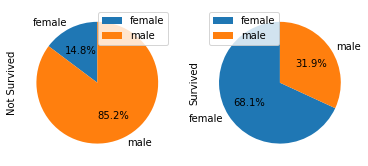

In [12]:
gender_surviving = df.groupby('Sex')['Survived'].value_counts().unstack()
total = gender_surviving.sum().sum()
p_gender_surviving = gender_surviving.div(total)
p_gender_surviving = p_gender_surviving.rename(columns={0: "Not Survived", 1: "Survived"})
p_gender_surviving = p_gender_surviving.rename_axis(index="", columns="")
display(p_gender_surviving)
print("")

# Plotting the results into a pie chart
p_gender_surviving.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

This is the second approach, which uses the groupby statement which comes included with the pandas library

Every single value count inside the dataframe gets divided by the sum of all values inside the table, giving us the correct probability.

At first glance, it looks like a much more complex solution in terms of code, but this complexity is compensated in much less text and code operations, which is a very good practice.

In [13]:
p_gender_surviving.to_string()

'        Not Survived  Survived\n                              \nfemale      0.090909  0.261504\nmale        0.525253  0.122334'

------------------------------------------------

## **Question 5** <a class="anchor" id="question5"></a>

Display in a DataFrame the probability of survival/not survival of all combinations of sex and class

In [14]:
# We use the second approach used in the last question

gender_survive_by_class = df.groupby(['Sex', 'Pclass'])['Survived'].value_counts().unstack()

total_survived = gender_survive_by_class[1].sum()
total_not_survived = gender_survive_by_class[0].sum()
p_gender_survive_by_class = gender_survive_by_class.div(total_survived + total_not_survived) # We want to divide each cell by the sum of all rows in the df

p_gender_survive_by_class = p_gender_survive_by_class.rename(columns={0: "Not Survived", 1: "Survived"})
p_gender_survive_by_class = p_gender_survive_by_class.rename_axis(columns=[""]) # Here we are just basically removing the column name "Survived", just to make the df look prettier, just like in the previous line of code

display(p_gender_survive_by_class)

Not Survived  Survived
Sex    Pclass                        
female 1           0.003367  0.102132
       2           0.006734  0.078563
       3           0.080808  0.080808
male   1           0.086420  0.050505
       2           0.102132  0.019080
       3           0.336700  0.052750

Here we can see the results plotted, each bar represents one combination of gender + class. The blue part of each bar represents the people who survived, and the orange represents the ones that did not.

As we can see, the vast majority of fatalities in the titanic were low-class males, meanwhile wealthy women got the possibility to save themselves.

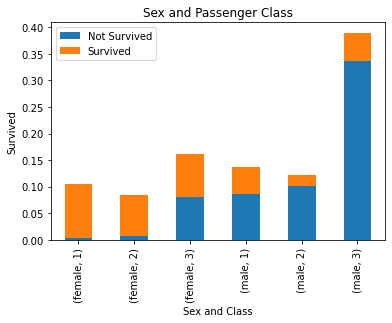

In [15]:
# Plotting the passenger's survival percentages based on their sex and class.

p_gender_survive_by_class.plot(kind='bar', stacked=True)
plt.xlabel('Sex and Class');plt.ylabel('Survived');plt.title('Sex and Passenger Class')
plt.show()

## **Question 6** <a class="anchor" id="question6"></a>

Present three insights about the dataset, each of them relating at least 3 different variables, and support them by code and numbers

### **Insight 1** <a class="anchor" id="insight1"></a>

A significant number of passengers who had a family member on board also survived, suggesting that having a relative on board may have increased their chances of survival.

In [16]:
#Dataframes with the data of the people with and without family members on board
family_data = df.loc[(df["SibSp"] > 0) | (df["Parch"] > 0)]
not_family_data = df.loc[(df["SibSp"] == 0) & (df["Parch"] == 0)]

In [17]:
#Survivors and not survivors for the ones with and without family members
family_survivors = family_data["Survived"].value_counts()
not_family_survivors = not_family_data["Survived"].value_counts()

In [18]:
#Rates of surviving for both possibilities
family_survival_rate = family_survivors[1] / (family_survivors[0] + family_survivors[1]) * 100
not_family_survival_rate = not_family_survivors[1] / (not_family_survivors[0] + not_family_survivors[1]) * 100

Survival rate among passengers with family members: 50.56%
Survival rate among passengers without family members: 30.35%

We can observe that passengers with brothers, sisters, parents or spouses onboard, had a 20.21% more chances of survival



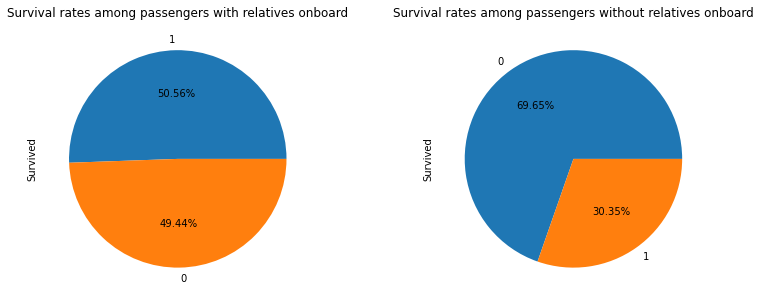

In [19]:
# Printing the survival rates
print("Survival rate among passengers with family members: {:.2f}%".format(family_survival_rate))
print("Survival rate among passengers without family members: {:.2f}%".format(not_family_survival_rate))
print("")
print("We can observe that passengers with brothers, sisters, parents or spouses onboard, had a {:.2f}%".format(family_survival_rate - not_family_survival_rate), 
      "more chances of survival")
print("")

# Plot the number of survivors and non-survivors in the family_data and not_family_data dataframes
fig = plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
f1 = family_survivors.plot.pie(title='Survival rates among passengers with relatives onboard',autopct='%.2f%%')
plt.subplot(1, 2, 2)
f1 = not_family_survivors.plot.pie( title='Survival rates among passengers without relatives onboard',autopct='%.2f%%')

### **Insight 2** <a class="anchor" id="insight2"></a>

Another thing we wanted to check out is which age ranges were the ones that survived the most and the least, a new column was created in the dataframe in order to do so, and we did the following:

In [20]:
# Instead of the regular approach when creating the "Age-Range" column, pandas comes with a built-in function that defines bins to input the data that we need.
  # This would be the first solution:

df.loc[df["Age"] <= 18 , "Age Range"] = "0-18"
df.loc[(df["Age"] > 18) & (df["Age"] <= 30)  , "Age Range"] = "18-30"
df.loc[(df["Age"] > 30) & (df["Age"] <= 50)  , "Age Range"] = "30-50"
df.loc[(df["Age"] > 50) , "Age Range"] = "50+"

In [21]:
# And this would be the second one, a bit more sophisticated, we basically define the labels and the bins used, and then we pass those parameters to the pandas.cut() function
bins = [0, 18, 30, 50, df['Age'].max()]
labels = ['0-18', '18-30', '30-50', '50+']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [22]:
# We compute this new column into a pivot table and display it along with the sex variable.

age_range_df = df.pivot_table(
                    index = ["Sex" , "Age Range"],
                    values = "Survived")

display(age_range_df)
print("")

Survived
Sex    Age Range          
female 0-18       0.676471
       18-30      0.755556
       30-50      0.779070
       50+        0.941176
male   0-18       0.338028
       18-30      0.155556
       30-50      0.225806
       50+        0.127660

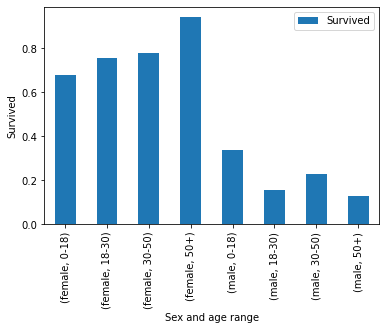

In [23]:
# Plotting the survival rates
age_range_df.plot(kind='bar')
plt.ylabel('Survived')
plt.xlabel('Sex and age range')
plt.show()

Woman above 50 years old had the most probability of surviving with a 94.12% while men above the age of 50 had the least probability of surviving with a 12.77%

### **Insight 3** <a class="anchor" id="insight3"></a>

Analyzing the dataset, we wanted to know more about the cabins and the ports. For this we create a new variable "Known Cabin" for people we actually now they were in a cabin.

Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [24]:
df["Known Cabin"] = ~df["Cabin"].isnull() # All cabin values that are not null

In [25]:
rich = df.groupby(["Embarked","Known Cabin"])["Fare"].mean()
rich

Embarked  Known Cabin
C         False           30.983335
          True           101.520957
Q         False           11.262388
          True            50.025000
S         False           18.003064
          True            63.316440
Name: Fare, dtype: float64

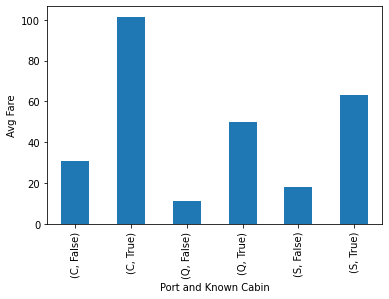

In [26]:
rich.plot(kind='bar')
plt.ylabel('Avg Fare')
plt.xlabel('Port and Known Cabin')
plt.show()

So as we can see, people the embarked from port C and we know their cabin, pay way more in average than the rest. Also for people we dont known if they got a cabin, the ones for Port C also pay more in average than people from the other ports that dont have a cabin assigned.

### **Bonus Insight - The captain went down with the ship** 

According to tradition, the captain of a boat is always the last one to leave in an emergency situation. This is known as the "captain goes down with the ship" tradition. There are exceptions to this tradition, such as the Costa Concordia incident.

In [27]:
df[df["Name"].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Range,Known Cabin
745,746,0,1,Capt. Edward Gifford,male,70.0,1,1,WE/P 5735,71.0,B22,S,50+,True


In this case, the captain Edward Gifford died in the tragedy of the Titanic

---------------------------------------------------

## **Question 7** <a class="anchor" id="question7"></a>

Devise two distinct strategies to impute the missing values in the Age column.

As we saw before, there are three columns with missing values: "Age" , "Cabin" and "Embarked". We only need to find two ways of inputting values into the "Age" column.

First, we want to check the correlation between variables, specially the ones more correlated with the "Age" column. Which will mean that every change in one of those variables, has a big repercusion in "Age"

In [28]:
# We compute the correlation between the variables
corr = df.corr()

<AxesSubplot:>

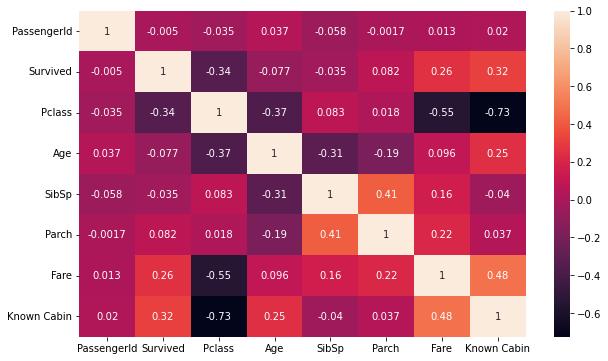

In [29]:
# We use a heatmap to display the correlation of variables
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot= True)

As we see in the heatmap, the varibales Pclass and SibSp are the variables that correlate the most with the Age variable.

Let's use these two variables first for the missing values inputting strategy number 1

### Strategy *1* <a class="anchor" id="strategy1"></a>

In [30]:
# We created 3 dataframes
  # A copy of the original df, where the resulting age would be stored.
  # A dataframe containing the mean age for every known combination of Sex, Pclass and SibSp that exists.
  # A dataframe with every row of the original which contains a null value in the "Age" column.

df_1 = df.copy()
median_ages_df_1 = df_1.groupby(["Sex","Pclass","SibSp"])["Age"].median().unstack()
null_age_df = df.loc[df["Age"].isnull()].copy()

In [31]:
# Taking a deep look into the median ages table, we find that, for some reason, a family of 8 embarked the titanic?
  # And the worst thing is that these guys dont want to talk about their ages at all!

median_ages_df_1

SibSp             0     1     2     3    4     5   8
Sex    Pclass                                       
female 1       31.5  37.0  21.0  23.5  NaN   NaN NaN
       2       30.0  27.5  24.0  30.0  NaN   NaN NaN
       3       22.0  28.5   7.0   8.0  7.5  16.0 NaN
male   1       40.0  38.0  47.0  19.0  NaN   NaN NaN
       2       30.0  31.0  23.0   NaN  NaN   NaN NaN
       3       27.0  25.0  27.0   4.0  5.5  10.0 NaN

In [32]:
# Since we have no clue about what their age can be, we are going to use the median age for the closest family, which is the closest information that we have.
  # Which are the families with 5 members

median_ages_df_1.loc["female",3][8] = median_ages_df_1.loc["female",3][5]
median_ages_df_1.loc["male",3][8] = median_ages_df_1.loc["male",3][5]
median_ages_df_1

# This is not the most optimal approach at all. We will see that the next one tackles the problem way better.

SibSp             0     1     2     3    4     5     8
Sex    Pclass                                         
female 1       31.5  37.0  21.0  23.5  NaN   NaN   NaN
       2       30.0  27.5  24.0  30.0  NaN   NaN   NaN
       3       22.0  28.5   7.0   8.0  7.5  16.0  16.0
male   1       40.0  38.0  47.0  19.0  NaN   NaN   NaN
       2       30.0  31.0  23.0   NaN  NaN   NaN   NaN
       3       27.0  25.0  27.0   4.0  5.5  10.0  10.0

In [33]:
# This block of code is a little complex, basically it is iterating through all the lines in the dataframe with missing age values.
  # And then, it assigns the age we obtained from the median_dataframe based on the "Sex", "Pclass" and "SibSp" values of said row.

for i in null_age_df.index:
    for j in df_1.index:
        if(i == j):
            df_1["Age"][i] = ((median_ages_df_1.loc[df_1["Sex"][j], df_1["Pclass"][j]])[df_1["SibSp"][j]])

In [34]:
# Here, we are able to check:
  # if there are any null values in the dataframe
  # The descriptive statistics of the new dataframe
  # The descriptive statistics of the main dataframe (the one with nulls)

display(df_1.loc[df_1["Age"].isnull()])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Range,Known Cabin


In [35]:
print("")
display(df_1["Age"].describe())
print("")
display(df["Age"].describe())

count    891.000000
mean      29.217363
std       13.399848
min        0.420000
25%       22.000000
50%       27.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

-----------------------------------------------

### Strategy *2* <a class="anchor" id="strategy2"></a>

For this second approach, another cool thing to try is to find the median age based on the passenger sex, if they have any family member onboard and their title.

Some titles are more common for certain age ranges, so it seems like an interesting insight we can use.

In [36]:
# We start by reviewing the title each passenger have, for this we create a new column "title". 
  # We also create a boolean column which displays true or false depending if the passenger has any family member on board.

df["Family"] = (df["SibSp"]>0) & (df["Parch"]>0)
df["title"] = df["Name"].str.split(".").str[0]

df.groupby(["Sex","title"])["Age"].median().unstack()

title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,NaN,NaN,NaN,49.0,NaN,48.0,NaN,NaN,21.0,24.0,24.0,NaN,35.0,28.0,NaN,NaN,33.0
male,70.0,58.0,40.0,44.0,38.0,NaN,48.5,3.5,NaN,NaN,NaN,30.0,NaN,NaN,46.5,49.0,NaN


In [37]:
# The second test dataframe is created, plus the new one with the median ages that we need.

df_2 = df.copy()
median_ages_df2 = df.groupby(["Sex","Family","title"])["Age"].median().unstack()
median_ages_df2

title          Capt   Col   Don    Dr  Jonkheer  Lady  Major  Master  Miss  \
Sex    Family                                                                
female False    NaN   NaN   NaN  49.0       NaN  48.0    NaN     NaN  23.0   
       True     NaN   NaN   NaN   NaN       NaN   NaN    NaN     NaN   8.0   
male   False    NaN  58.0  40.0  44.0      38.0   NaN   48.5     4.0   NaN   
       True    70.0   NaN   NaN   NaN       NaN   NaN    NaN     3.0   NaN   

title          Mlle   Mme    Mr   Mrs    Ms   Rev   Sir  the Countess  
Sex    Family                                                          
female False   24.0  24.0   NaN  35.0  28.0   NaN   NaN          33.0  
       True     NaN   NaN   NaN  36.0   NaN   NaN   NaN           NaN  
male   False    NaN   NaN  29.5   NaN   NaN  46.5  49.0           NaN  
       True     NaN   NaN  31.0   NaN   NaN   NaN   NaN           NaN

In [38]:
# Same difficult block of code, just changing the variables used.

for i in null_age_df.index:
    for j in df_2.index:
        if(i == j):
            df_2["Age"][i] = ((median_ages_df2.loc[df_2["Sex"][j], df_2["Family"][j]])[df_2["title"][j]])

In [39]:
# Here, we are able to check:
  # if there are any null values in the dataframe
  # The descriptive statistics of the new dataframe
  # The descriptive statistics of the main dataframe (the one with nulls)

display(df_2.loc[df_2["Age"].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Range,Known Cabin,Family,title


In [40]:
print("")
display(df_2["Age"].describe())
print("")
display(df["Age"].describe())

count    891.000000
mean      29.271235
std       13.360255
min        0.420000
25%       22.000000
50%       29.500000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64